# Predicting Heart Disease

## Table of contents

* Introduction and Context
* Preliminary Glimpse Into the Data
* Data cleaning
* Exploratory Data Analysis
* Choosing the Best Features
* Creating the KNN algorithm
* Conclusion and Next Steps
* reference list

## 1. Introduction and Context

### 1.1 background

I shall be acting as a data scientist investigating the link between different biological parameters and heart disease using a KNN algorithm. 

The features are as follows:

`Age`: age of the patient [years]

`Sex`: sex of the patient [M: Male, F: Female]

`ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

`RestingBP`: resting blood pressure [mm Hg]

`Cholesterol`: serum cholesterol [mm/dl]

`FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

`RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

`MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]

`ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]

`Oldpeak`: oldpeak = ST [Numeric value measured in depression]

`ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

`HeartDisease`: output class [1: heart disease, 0: Normal]

### 1.2 context

According to the British Heart Foundation, 26% of all deaths can be attributed to heart disease, Roughly 175,000 deaths per year.(BHF, 2024)

Many factors contribute to heart disease. Some common ones are: poor sleep, poor diet, lack of exercise and obesity. Being able to risk factors in heart disease would be useful in helping to prevent patients prematurely dying. (coffrey et al, 2021)

In this project, I used a dataset from Kaggle and made a K Nearest Neighbors algorithm to predict heart disease in patients

### 1.3 Goal

The key to successfully treating heart disease is by catching it before it becomes a chronic issue. Using this KNN algorithm, the aim will be to accurately predict who might be at risk of heart disease before it progresses to a stage that would require more invasive intervention. 

### 2. Preliminary Glimpse Into the Data

In [4]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

#style
plt.style.use('seaborn-v0_8')

#reading in data
hdp = pd.read_csv("C:/Users/Sam Morley/Documents/Data science studies/Datasets/Heart disease KNN algorithm/heart.csv")

#Snapshot of data shape

hdp.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 3. Data Cleaning

In [6]:
#Checking for null values
print( f" Shape of the data- rows: {hdp.shape[0]}, columns: {hdp.shape[1]}\n")
print(f"{hdp.info()}")

 Shape of the data- rows: 918, columns: 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [7]:
#What data types are present in the data
print(hdp.dtypes)
hdp.dtypes.value_counts()

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


int64      6
object     5
float64    1
Name: count, dtype: int64

There are 6 numerical columns, and 5 categorical columns. However, on inspecting the dataset the columns HeartDisease and FastingBS are also categorical. 

In [9]:
#Investigating the values in the categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'FastingBS']

for feature in categorical_features:
    print(hdp[feature].value_counts(), end='\n\n')

Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

HeartDisease
1    508
0    410
Name: count, dtype: int64

FastingBS
0    704
1    214
Name: count, dtype: int64



There are no obvious null values present in the data. We can also see that the categorical data is clean, with no typos or irrelvant data.

Next let's look into the numerical data and investigate less obvious potential errors.


In [11]:
hdp.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In terms of what stands out to me, I think that rest  BP and cholesterol have some null values as it's impossible to be 0. The dataset is alsoways weighted for older people.

Looking at the descriptive statistics, we can see that the min value for FastingBP and Cholesterol are both 0. Using my background knowledge, I know that these values are errors. Let's fix that.

In [13]:
num_nulls = hdp[hdp["RestingBP"] == 0]
print(len(num_nulls))

num_nulls_cho = hdp[hdp["Cholesterol"] == 0]
print(len(num_nulls_cho))

1
172


For the RestingBP column, there's only 1 error. Therefore, we won't lose too much data by removing the row. However, with the Cholesterol column, there's 172 errors. Deleting that many rows would mean losing a lot of data. I'll replace the error value with the medians for people with heart disease and people without heart disease.

In [15]:
hdp_clean = hdp[hdp["RestingBP"] != 0]


In [16]:
heartdisease_mask = hdp_clean["HeartDisease"]==0

cholesterol_without_heartdisease = hdp_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = hdp_clean.loc[~heartdisease_mask, "Cholesterol"]

hdp_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
hdp_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

Now that the data has been cleaned it is ready for analysis.

### 4. Exploratory Data Analysis

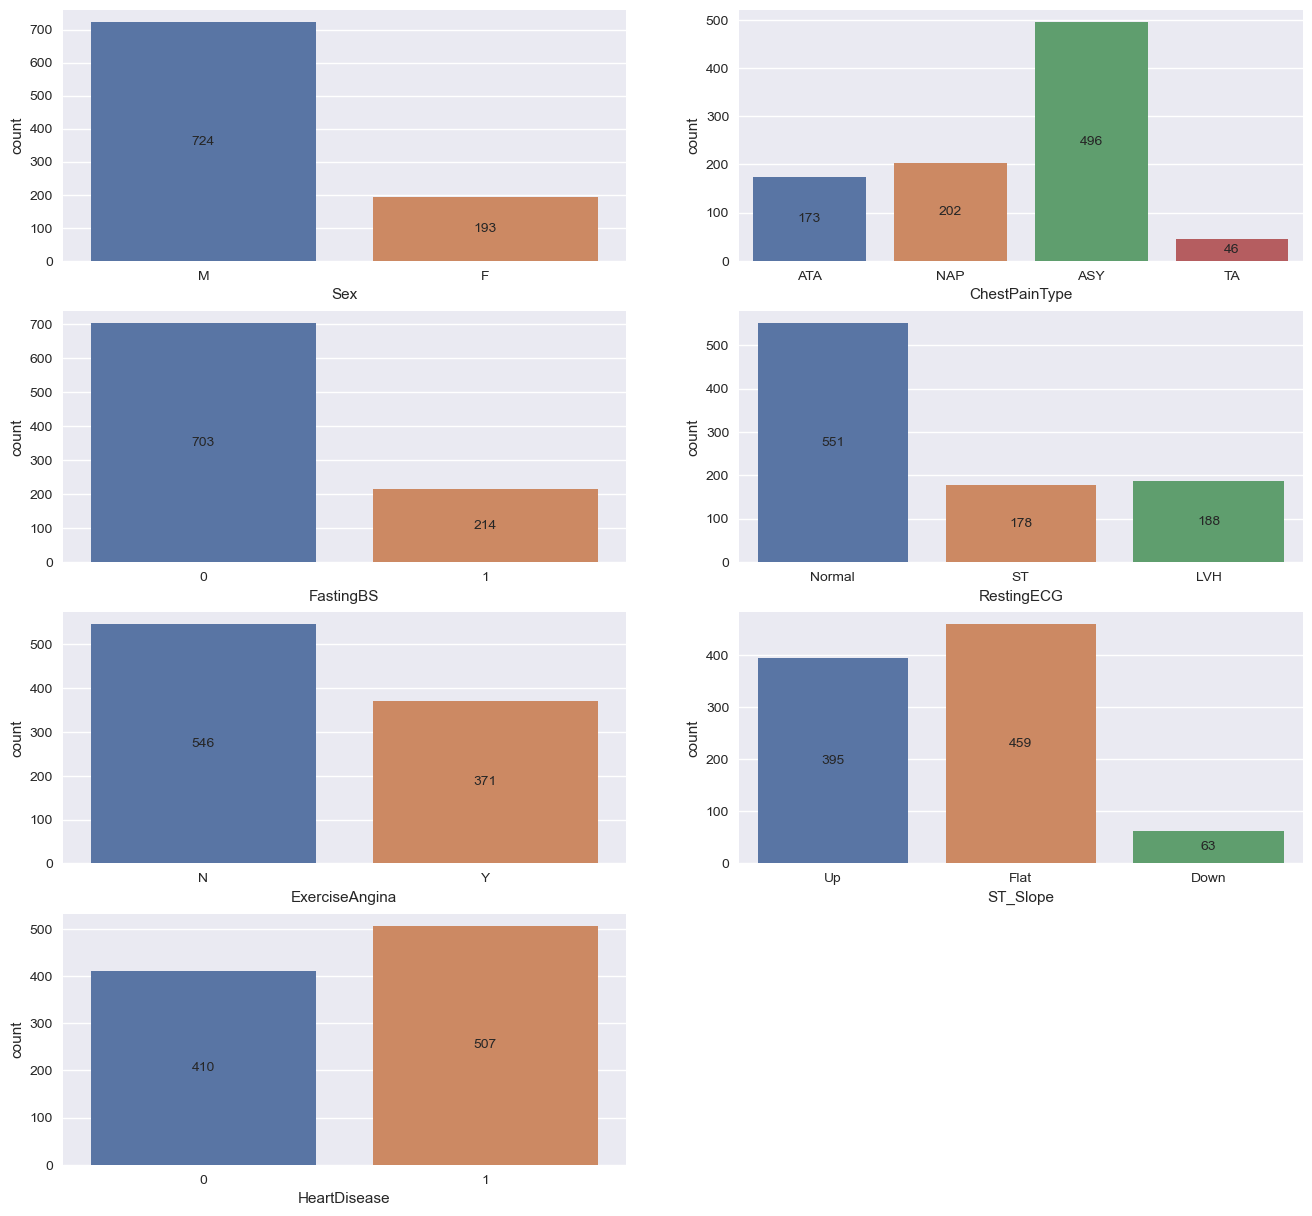

In [27]:
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for indx,col in enumerate (categorical_cols):
    ax = plt.subplot(4,2, indx + 1)
    sns.countplot(x = hdp_clean[col], ax=ax, hue = hdp_clean[col], legend = False, palette = "deep")
    for container in ax.containers:
        ax.bar_label(container, label_type="center")
plt.show()
        



Having a look at the graphs, we can see a potential problem with the date. The majority of patients are male, which calls into question the accuracy of the results for female patients. We will bear this in mind for now.

Patients with and without heart disease are roughly similar.

In terms of chest pain, we can see that the highest is asymptomatic. Grouping the data by the HeartDisease column may help give us a clearer insight.

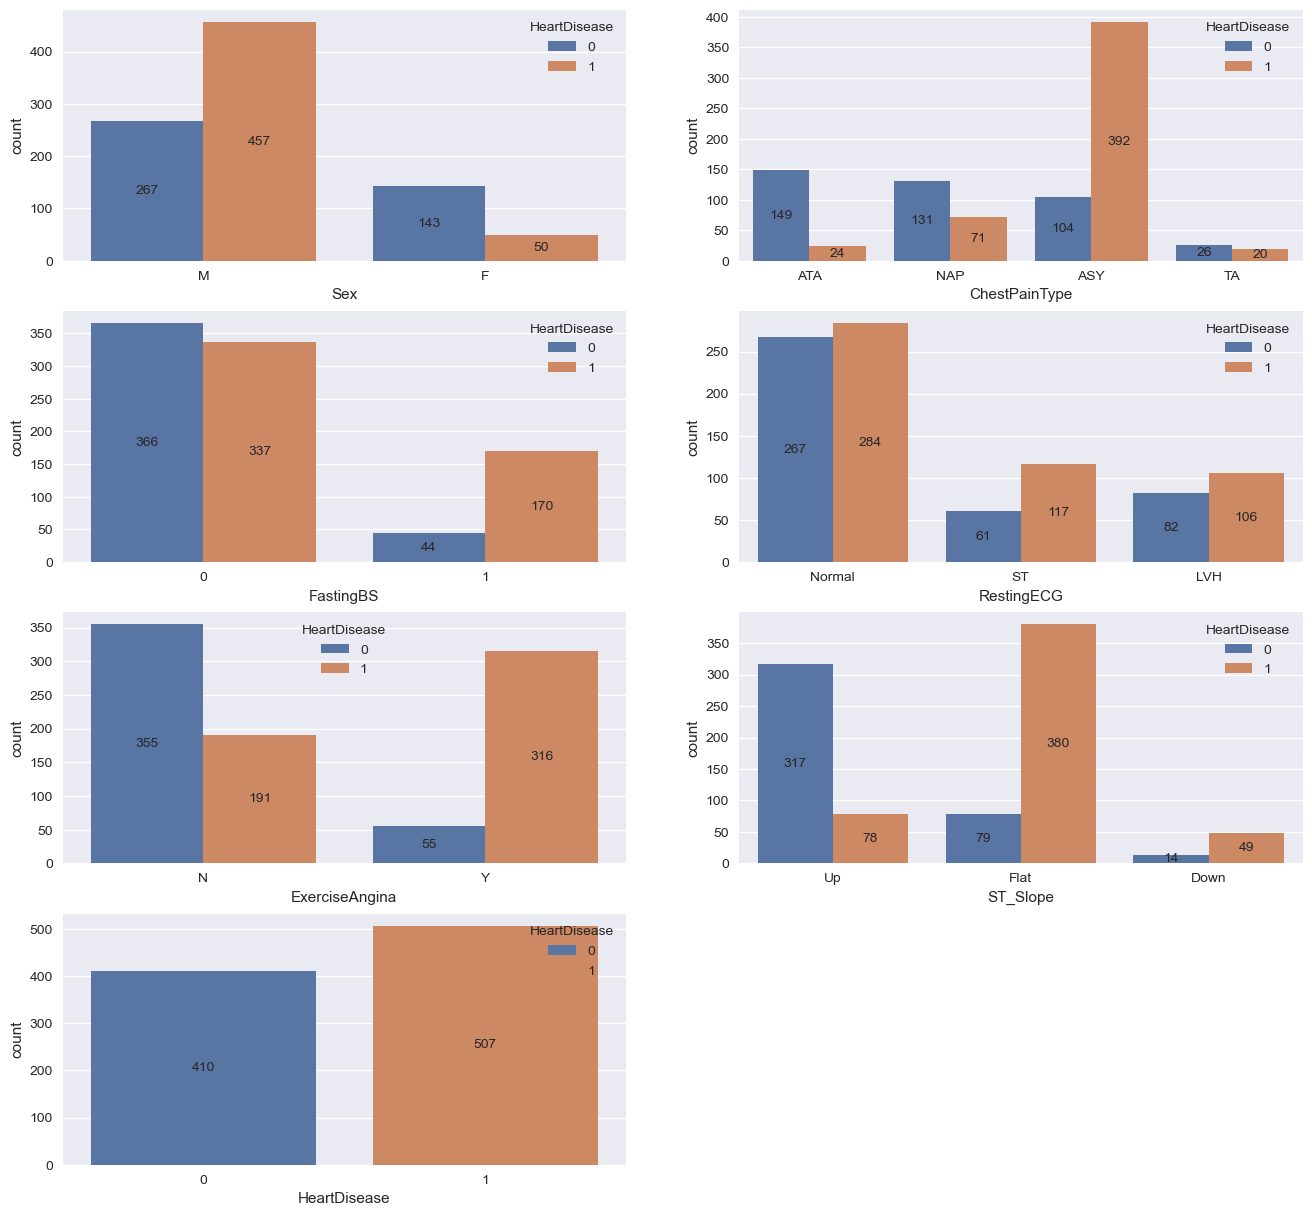

In [29]:
categorical_cols_grouped = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]

fig = plt.figure(figsize=(16,15))

for indx,col in enumerate (categorical_cols):
    ax = plt.subplot(4,2, indx + 1)
    sns.countplot(x = hdp_clean[col], ax=ax, hue = hdp_clean["HeartDisease"], palette = "deep")
    for container in ax.containers:
        ax.bar_label(container, label_type="center")
plt.show()

Looking at the grouped data, we can see that in terms of ChestPainType asymptomatic is primarily people with heart disease. Another clear predictor is whether the patient suffers from angina whilst exercising. Finally, the type of ST slope is also key. If the patient has an up slope, they are much more likely to not have heart diease. On the other hand, if the have a flat slope they are much more likely to suffer from heart disease. Let's have a deeper look into some more common indicaters of heart diease.

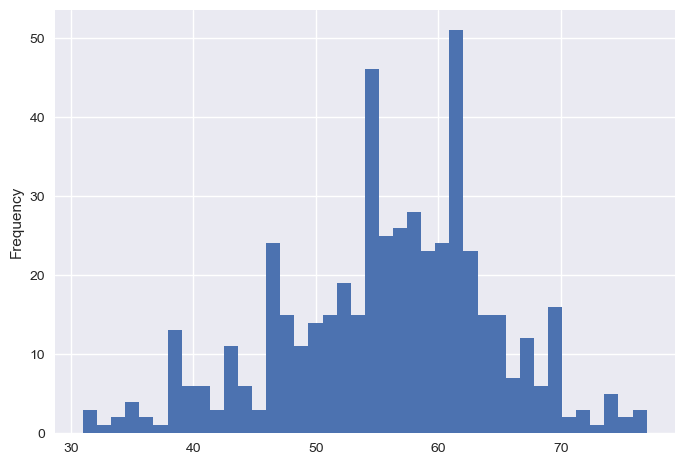

In [31]:
heart_disease = hdp_clean[hdp_clean["HeartDisease"] == 1]

heart_disease["Age"].plot.hist(bins = 40)
plt.show()

In [33]:
heart_disease["Age"].median()

57.0

Looking at the histogram plot, we can see that heart disease tends to occur between the ages of 50 to 65, with a median age of 57 years. This will be very useful in knowing when a prediction of heart disease may become true.

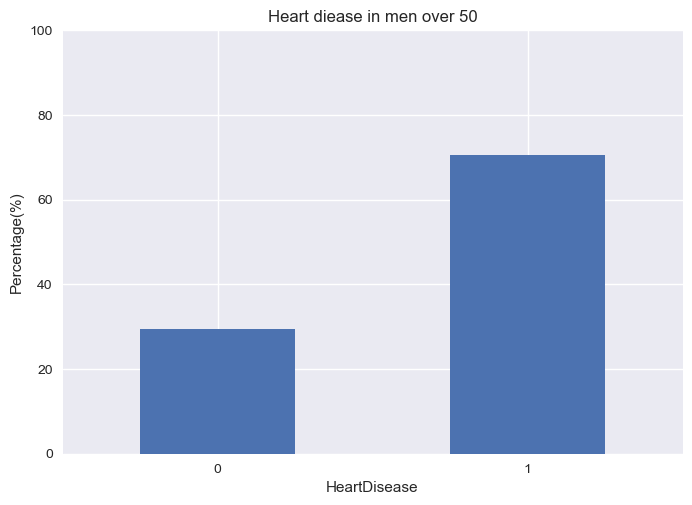

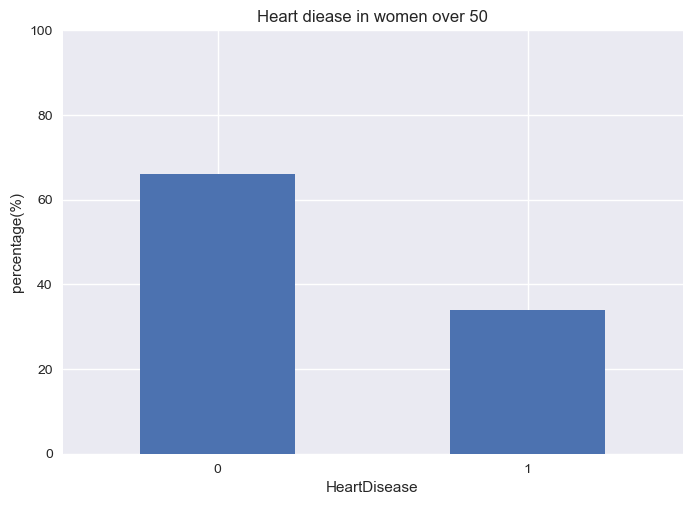

In [35]:
over_50_men = hdp_clean[(hdp_clean["Age"] > 50) & (hdp_clean["Sex"] == "M")]
over_50_women = hdp_clean[(hdp_clean["Age"] > 50) & (hdp_clean["Sex"] == "F")]

men_barplot_data = over_50_men["HeartDisease"].value_counts(sort = False, normalize = True) * 100
men_barplot_data.plot.bar()
plt.xticks(rotation = 360)
plt.title("Heart diease in men over 50")
plt.ylabel("Percentage(%)")
plt.ylim(0,100)
plt.show()

women_barplot_data = over_50_women["HeartDisease"].value_counts(sort = False, normalize = True) * 100
women_barplot_data.plot.bar()
plt.xticks(rotation = 360)
plt.title("Heart diease in women over 50")
plt.ylabel("percentage(%)")
plt.ylim(0,100)
plt.show()

From the above barplots, we can see that the majority of men over 50 (70%) have heart diease, whilst only minority of women over 50 (35%) have heart disease. This further supports the idea that the dataset is weighted towards men, and therefore should be used with caution when discussing predictions of heart disease in women.

## 5. Choosing the Best Features

Now that the data has been cleaned and we understand the context of the dataset better, let's try to predict heart disease using the dataset.

In [38]:
#This allow us to use nominal in our prediction
hdp_clean = pd.get_dummies(data=hdp, columns=["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first= True)



In [40]:
hdp_corr = hdp_clean.corr().abs()

hdp_corr

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,0.095282,0.382045,0.258612,0.282039,0.055750,0.218165,0.011335,0.032042,0.198039,0.230566,0.136798,0.215793,0.185568,0.258067
RestingBP,0.254399,1.000000,0.100893,0.112135,0.164803,0.107589,0.005133,0.046153,0.041348,0.049855,0.070193,0.116851,0.090447,0.155101,0.099207,0.096146
Cholesterol,0.095282,0.100893,1.000000,0.235792,0.050148,0.232741,0.200092,0.150954,0.006634,0.017365,0.260974,0.038470,0.133106,0.034166,0.050953,0.094027
MaxHR,0.382045,0.112135,0.235792,1.000000,0.160691,0.400421,0.189186,0.253735,0.134580,0.100025,0.131438,0.023801,0.157879,0.370425,0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.160691,1.000000,0.403951,0.105734,0.262124,0.106212,0.032231,0.052698,0.116719,0.055958,0.408752,0.283295,0.450577
HeartDisease,0.282039,0.107589,0.232741,0.400421,0.403951,1.000000,0.305445,0.401924,0.212964,0.054790,0.267291,0.091580,0.102527,0.494282,0.554134,0.622164
Sex_M,0.055750,0.005133,0.200092,0.189186,0.105734,0.305445,1.000000,0.161522,0.066486,0.004031,0.120076,0.010634,0.063715,0.190664,0.116077,0.150942
ChestPainType_ATA,0.218165,0.046153,0.150954,0.253735,0.262124,0.401924,0.161522,1.000000,0.256767,0.110679,0.140514,0.107941,0.046111,0.300365,0.304667,0.357588
ChestPainType_NAP,0.011335,0.041348,0.006634,0.134580,0.106212,0.212964,0.066486,0.256767,1.000000,0.122381,0.039249,0.005010,0.042236,0.166030,0.072031,0.093583
ChestPainType_TA,0.032042,0.049855,0.017365,0.100025,0.032231,0.054790,0.004031,0.110679,0.122381,1.000000,0.026885,0.057719,0.011611,0.128105,0.010486,0.002087


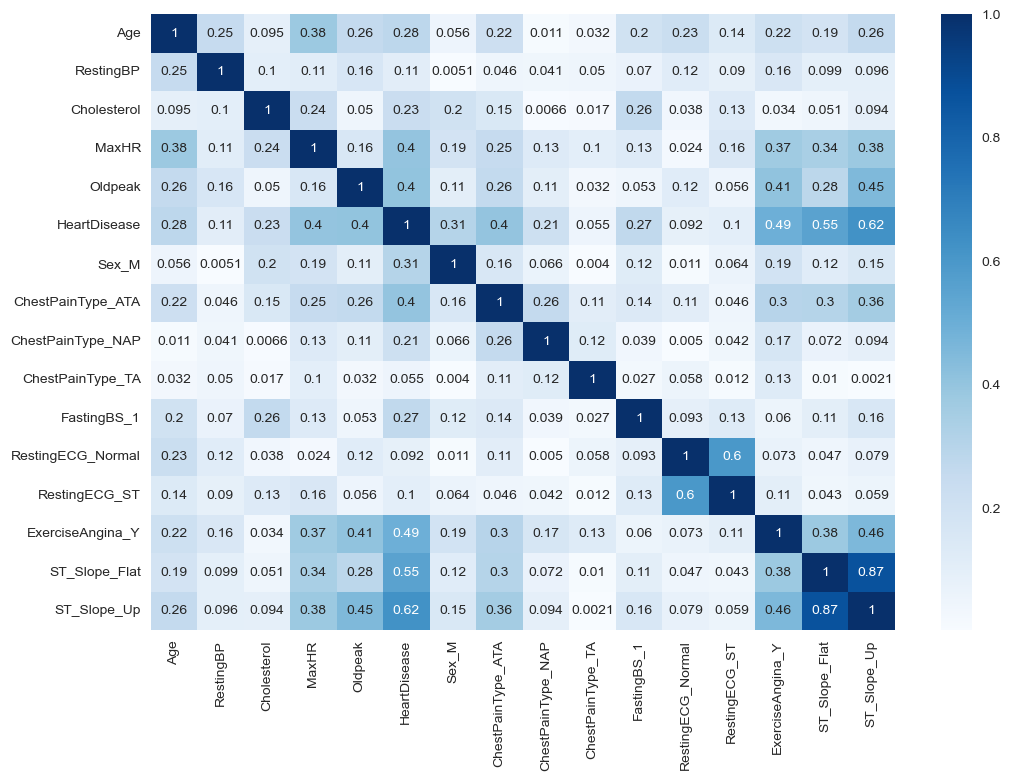

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(hdp_corr, annot = True, cmap= "Blues")
plt.show()




Although this heatmap is useful, it's still a little noisy. Let's just focus on correlations over 0.3.

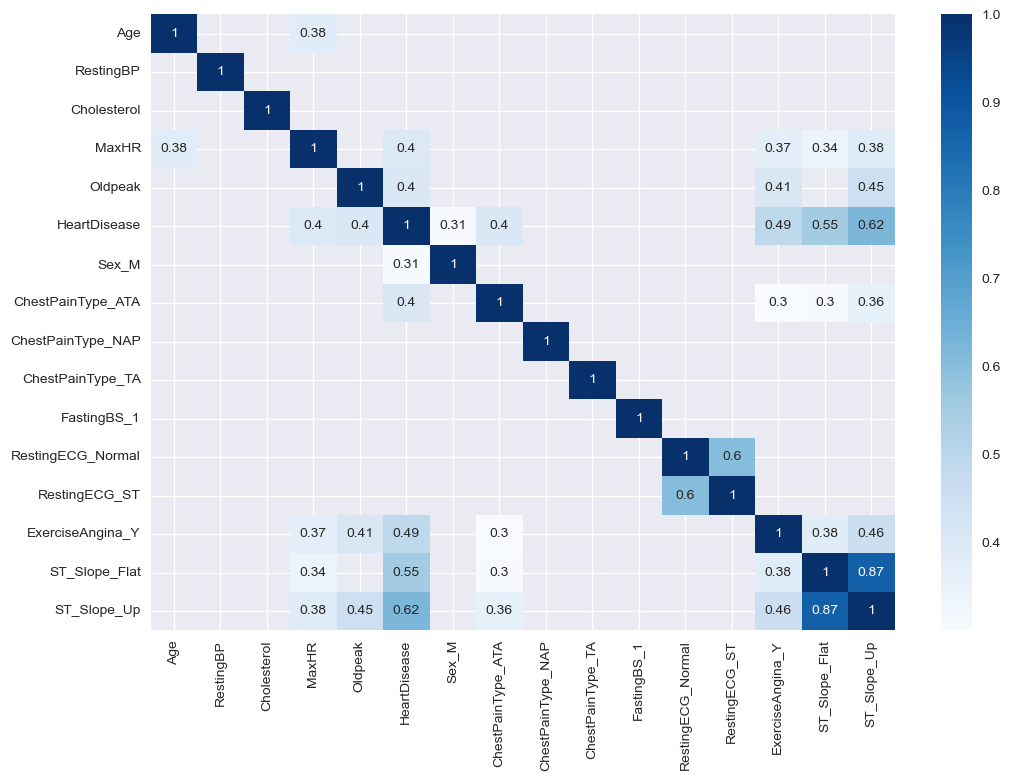

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(hdp_corr[hdp_corr > 0.3], annot=True, cmap="Blues")
plt.show()

From our correlation heatmap, we can see that a number of features are correlated with heart disease:

*oldpeak

*MaxHR

*ChestPainType_ATA

*ExerciseAngina_Y

*ST_Slope_Flat

*ST_SLOPE_UP

Cholesterol does not seem like a strong indicator of heart disease in this dataset, which is curious. For now, we can narrow down the features we'll us to: OldPeak, Sex_M, ExerciseAngina_Y, ST_Slope_Flat and ST_Slope_Up.

## 6. Creating the KNN Algorithm

In [52]:
X = hdp_clean.drop("HeartDisease", axis = 1)
y = hdp_clean["HeartDisease"]


X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.15, random_state = 100)

In [54]:
relevant_categorys = [["ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up", "Oldpeak","ChestPainType_ATA", "Sex_M"]]
accuracy_scores = {}
knn = KNeighborsClassifier(n_neighbors=5)
for category in relevant_categorys[0]:
    knn.fit(X_train[[category]],y_train)
    accuracy_scores[category] = f"The accuracy score trained on k=5 for {category} is {round(knn.score(X_val[[category]], y_val) * 100, 2)}%."
    
accuracy_scores
    

{'ExerciseAngina_Y': 'The accuracy score trained on k=5 for ExerciseAngina_Y is 75.36%.',
 'ST_Slope_Flat': 'The accuracy score trained on k=5 for ST_Slope_Flat is 71.74%.',
 'ST_Slope_Up': 'The accuracy score trained on k=5 for ST_Slope_Up is 78.26%.',
 'Oldpeak': 'The accuracy score trained on k=5 for Oldpeak is 60.14%.',
 'ChestPainType_ATA': 'The accuracy score trained on k=5 for ChestPainType_ATA is 41.3%.',
 'Sex_M': 'The accuracy score trained on k=5 for Sex_M is 41.3%.'}

From what we can see from the above, the greatest predictor was ST_Slope_up, followed by Exercise Angina, and then OldPeak

The biggest under performer was chestpaintype_ATA, which may be because it's much more of a general symptom than one specifically to heart disease.

We can make this algorithm more accurate by normalizing the features.


In [57]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[["ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up", "Oldpeak","ChestPainType_ATA", "Sex_M"]])
X_val_scaled = scaler.transform(X_val[["ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up", "Oldpeak","ChestPainType_ATA", "Sex_M"]])

In [59]:
relevant_categorys = [["ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up", "Oldpeak","ChestPainType_ATA", "Sex_M"]]


knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled,y_train)
accuracy_scores_scaled= knn_scaled.score(X_val_scaled, y_val)
    
print(f"The algorithms accuracy score was {round(accuracy_scores_scaled,2)}%.")

The algorithms accuracy score was 0.82%.


This accuracy score is quite good, however we can further refine it by using a grid search function. Once we have the best parameters, we can use the alogrithm on the test data.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 100)

In [64]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[["ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up", "Oldpeak","ChestPainType_ATA", "Sex_M"]])
X_test_scaled = scaler.transform(X_test[["ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up", "Oldpeak","ChestPainType_ATA", "Sex_M"]])

grid_params = {"n_neighbors": range(1, 100),
               "metric": ["minkowski", "manhattan"] 
              }
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring="accuracy")

In [66]:
knn_grid.fit(X_train_scaled,y_train)

best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

print(best_score)
print(best_params)

0.8435897435897436
{'metric': 'minkowski', 'n_neighbors': 7}


In [67]:
knn_final = KNeighborsClassifier(metric = "minkowski", n_neighbors = 8)
knn_final.fit(X_train_scaled, y_train)
print(knn_final.predict(X_test_scaled))

print(f"The accuracy score trained on k=8 was {round(knn_final.score(X_test_scaled, y_test) * 100,2)}%.")


[1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1]
The accuracy score trained on k=8 was 82.61%.


The algorithm has a 83.33% accuracy of correctly identifying whether a patient does or does not have heart disease! Before we celebrate this win however, let's have a quick look at the percentage of male to females in the different datasets to make sure no extra bias has creeped in

In [70]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts(normalize = True))

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts(normalize = True))

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts(normalize = True))

Distribution of patients by their sex in the entire dataset
Sex_M
True     0.78976
False    0.21024
Name: proportion, dtype: float64

Distribution of patients by their sex in the training dataset
Sex_M
True     0.788462
False    0.211538
Name: proportion, dtype: float64

Distribution of patients by their sex in the test dataset
Sex_M
True     0.797101
False    0.202899
Name: proportion, dtype: float64


The sex ratio in the training/test datasets are sufficiently similar to the entire dataset.

## 7. Conclusion and Next Steps

Our final model was trained using the following features:

- `Oldpeak`
- `Sex_M`
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `ST_Slope_Up`

and had a test set accuracy of `82.61`%. However, given the limitations of our data this accuracy might not be indicative of a well performing model.

There are a few things we could try next to get better results:

- Try out different features.
- Expand the grid search parameters to identify more optimal hyperparameters.
- Explore other algorithms that might perform better than k-NN.
- Try and collect more data.

## Reference list

BHF (2024) UK forecasts based on ONS population projections and latest CVD demographic profile (i.e. assumes unchanged epidemiology) 

Coffey S, Roberts-Thomson R, Brown A, Carapetis J, Chen M, Enriquez-Sarano M, Zühlke L, Prendergast BD. Global epidemiology of valvular heart disease. Nat Rev Cardiol. 2021 Dec;18(12):853-864. doi: 10.1038/s41569-021-00570-z. Epub 2021 Jun 25. PMID: 34172950.